In [1]:
# import libraries
from cil.optimisation.functions import L1Norm, MixedL21Norm
from cil.optimisation.operators import GradientOperator
from cil.optimisation.algorithms import PDHG
from cil.utilities import dataexample
from cil.utilities import noise
from cil.utilities.display import show2D

import matplotlib.pyplot as plt
import numpy as np

from skimage.metrics import structural_similarity as ssim

In [2]:
# Load a color image from the CIL gallery. 
data = dataexample.RAINBOW.get(size=(512,512))
data.reorder(['horizontal_y', 'horizontal_x','channel'])
ig = data.geometry

# Add gaussian noise
noisy_data = noise.saltnpepper(data, amount=0.1, seed = 10)

In [18]:
# Setup and run the PDHG algorithm
alpha = 1.
F = alpha*MixedL21Norm()
G = L1Norm(b=noisy_data)
K = GradientOperator(ig)

# Compute operator Norm
normK = K.norm()

# Primal & dual stepsizes
sigma = 1./normK
tau = 1./normK


pdhg = PDHG(f=F, g=G, operator=K, tau=tau, sigma=sigma,
            max_iteration = 1000, update_objective_interval = 200)
pdhg.run(verbose=2)

Initialised GradientOperator with numpy backend
PDHG setting up
PDHG configured
     Iter   Max Iter     Time/Iter        Primal          Dual     Primal-Dual
                               [s]     Objective     Objective             Gap
        0       1000         0.000    4.53712e+05   2.00000e+00    4.53710e+05
      200       1000         0.070    5.51615e+04   5.47940e+04    3.67501e+02
      400       1000         0.070    5.50648e+04   5.49526e+04    1.12189e+02
      600       1000         0.069    5.50214e+04   5.49787e+04    4.27856e+01
      800       1000         0.068    5.50093e+04   5.49855e+04    2.37546e+01
     1000       1000         0.068    5.50040e+04   5.49883e+04    1.56872e+01
----------------------------------------------------------------------------
     1000       1000         0.068    5.50040e+04   5.49883e+04    1.56872e+01
Stop criterion has been reached.



In [19]:
val_ssim = ssim(data.as_array(), pdhg.solution.as_array(), data_range = 1., multichannel=True)

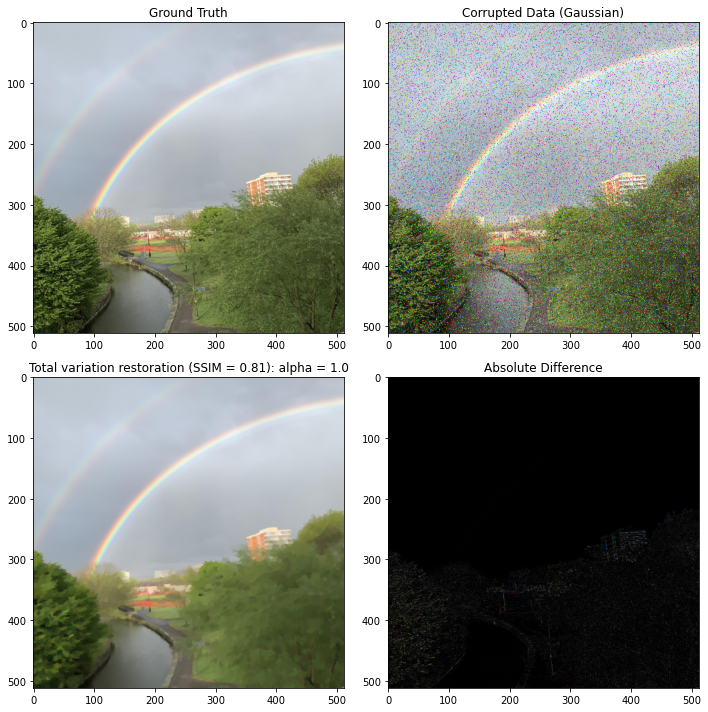

In [20]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
ax[0,0].imshow(data.as_array())
ax[0,0].set_title("Ground Truth")

ax[0,1].imshow(noisy_data.as_array())
ax[0,1].set_title("Corrupted Data (Gaussian)")
ax[1,0].imshow(pdhg.solution.as_array())
ax[1,0].set_title("Total variation restoration (SSIM = {:.2f}): alpha = {}".format(val_ssim, alpha))
ax[1,1].imshow((pdhg.solution-data).abs().as_array())
ax[1,1].set_title("Absolute Difference")
plt.tight_layout()
plt.show()